# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_ = 'table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_rows = []
# Loop through the scraped data to create a list of rows
mars_rows_raw = table.find_all('tr')

for row in mars_rows_raw[1:]:
    a_row = row
    data = a_row.find_all('td')
    a_row = [dat.text.strip() for dat in data]
    mars_rows.append(a_row)
    

In [7]:
# Create an empty list
mars_headers = []
# Loop through the scraped data to create a list of header
mars_headers_raw = table.find_all('th')

for header in mars_headers_raw:
    title = header.text
    mars_headers.append(title)

# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(columns = mars_headers)

for row in mars_rows:
    #get current length of dataframe
    row_placement = len(mars_temp_df)
    #add row to bottom of dataframe
    #https://saturncloud.io/blog/how-to-add-new-rows-to-a-pandas-dataframe/
    mars_temp_df.loc[row_placement] = row


In [8]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_temp_df['terrestrial_date']=pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol']=mars_temp_df['sol'].astype(int)
mars_temp_df['ls']=mars_temp_df['ls'].astype(int)
mars_temp_df['month']=mars_temp_df['month'].astype(int)
mars_temp_df['min_temp']=mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure']=mars_temp_df['pressure'].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
mars_temp_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [13]:
# 1. How many months are there on Mars?
print(f"{len(mars_temp_df['month'].unique())} months")

12 months


In [14]:
# 2. How many Martian days' worth of data are there?
print(f"{mars_temp_df['sol'].count()} days")

1867 days


In [15]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_temp_df.groupby(['month']).mean()['min_temp']
avg_low_temp

/var/folders/jw/dmfs8vy10ssfpf9j56cz60x40000gn/T/ipykernel_6509/2700763788.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_low_temp = mars_temp_df.groupby(['month']).mean()['min_temp']


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

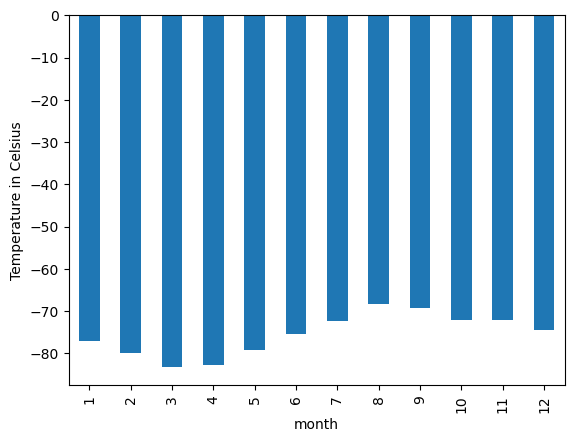

In [16]:
# Plot the average temperature by month
plot = avg_low_temp.plot(kind='bar')
plt.ylabel("Temperature in Celsius")
plt.show()

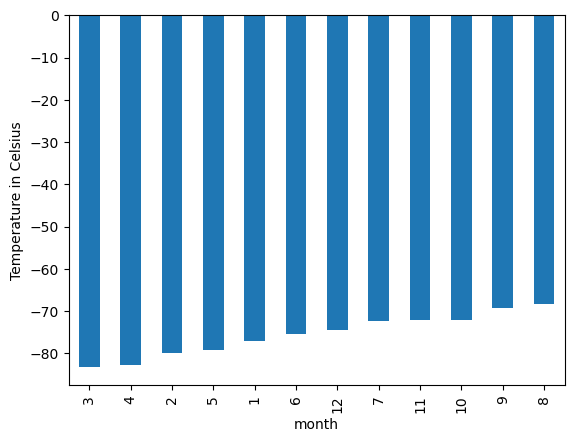

The third month is the coldest month at Curiosity's location
The eight month is the hottest month at Curiosity's location


In [17]:
# Identify the coldest and hottest months in Curiosity's location
plot = avg_low_temp.sort_values().plot(kind='bar')
plt.ylabel("Temperature in Celsius")
plt.show()
print("The third month is the coldest month at Curiosity's location")
print("The eight month is the hottest month at Curiosity's location")

In [18]:
# 4. Average pressure by Martian month
avg_low_psi = mars_temp_df.groupby(['month']).mean()['pressure']
avg_low_psi

/var/folders/jw/dmfs8vy10ssfpf9j56cz60x40000gn/T/ipykernel_6509/4173096883.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_low_psi = mars_temp_df.groupby(['month']).mean()['pressure']


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

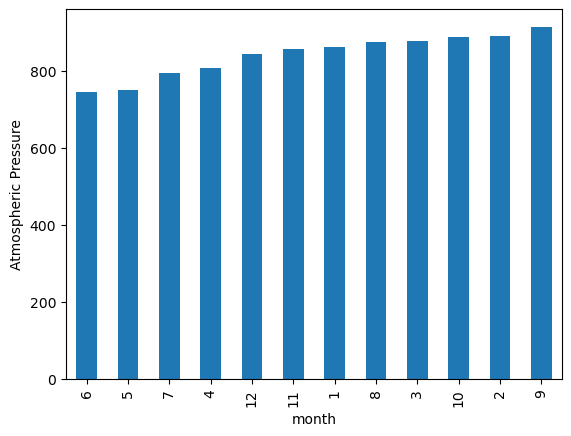

The sixth month is the month with the lowest average pressure
The ninth month is the month with the highest average pressure


In [19]:
# Plot the average pressure by month
plot = avg_low_psi.sort_values().plot(kind='bar')
plt.ylabel("Atmospheric Pressure")
plt.show()

print("The sixth month is the month with the lowest average pressure")
print("The ninth month is the month with the highest average pressure")

In [21]:
#5. About how many terrestrial (Earth) days exist in a Martian year
# Consider how many days elapse on Earth in the time that Mars circles the Sun once

#sort by terrestrial date and ls
solar_longitude_df = mars_temp_df.sort_values(['ls', 'terrestrial_date'])
solar_longitude_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0


In [23]:
mars_year = solar_longitude_df.iloc[2]['terrestrial_date'] - solar_longitude_df.iloc[1]['terrestrial_date']
print(f"Number of Earth days in a Martian year: {mars_year}")

Number of Earth days in a Martian year: 686 days 00:00:00


In [ ]:
mars_min_temp = mars_temp_df[['min_temp', 'terrestrial_date']]
mars_min_temp = mars_min_temp.set_index(mars_temp_df['sol'])
mars_min_temp.head()



,min_temp,terrestrial_date
sol,,
10,-75.0,2012-08-16
11,-76.0,2012-08-17
12,-76.0,2012-08-18
13,-74.0,2012-08-19
14,-74.0,2012-08-20


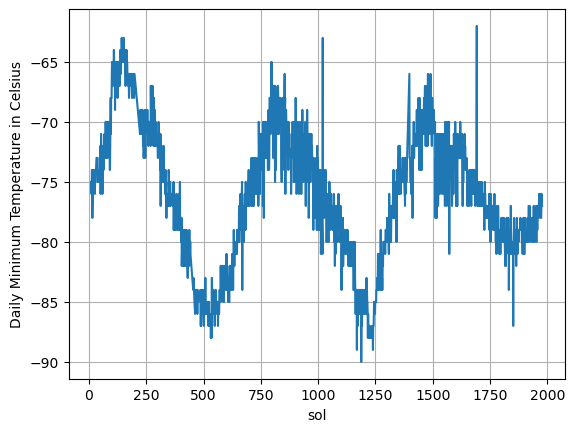

The distance between peaks is around 1470 sol to 800 sol, which is around 670 earth days.
A year on Mars seems to be around 670 Earth days.


In [ ]:
#Plot the daily minimum temperature
plot = mars_min_temp["min_temp"].plot()
plt.ylabel("Daily Minimum Temperature in Celsius")
plt.grid()
plt.show()

print("The distance between peaks is around 1470 sol to 800 sol, which is around 670 earth days.")
print("A year on Mars seems to be around 670 Earth days.")

3. What month has the coldest and hottest minimum temperature in Curiosity's location?

The third month is the coldest month at Curiosity's location
The eight month is the hottest month at Curiosity's location




4. What month has the lowest and highest average pressure on Mars?


The sixth month is the month with the lowest average pressure. The ninth month is the month with the highest average pressure.
Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

5. About how many terrestrial (Earth) days exist in a Martian year?

The distance between peaks is around 1470 sol to 800 sol, which is around 670 earth days. A year on Mars seems to be around 670 Earth days. According to the solar longitude, Mars was at a solar longitude of 0 on 2013-08-02, and then 2015-06-19, which is 686 days after 2013-08-02.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_temp_df.to_csv('mars_temp.csv',  encoding='utf8', index=False)

In [ ]:
browser.quit()